## **Modul 2: Data Analysis – Data Visualization**

### **With matplotlib & seaborn**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv('melb_data.csv')
pd.set_option('display.max_columns', None) 
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


<hr>

### **Nomor 1**

Tampilkan visualisasi yang menggambarkan persebaran harga rumah secara keseluruhan!

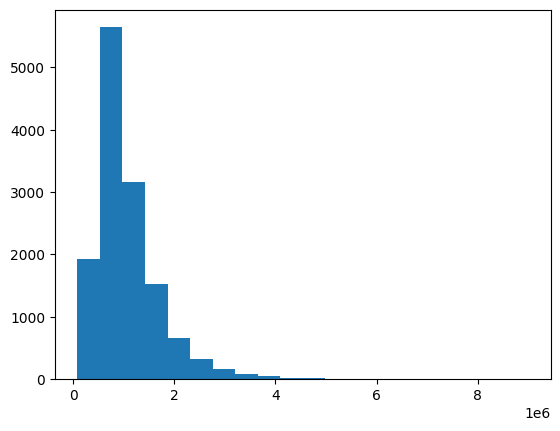

In [3]:
plt.hist(df['Price'],bins=20)
plt.show()

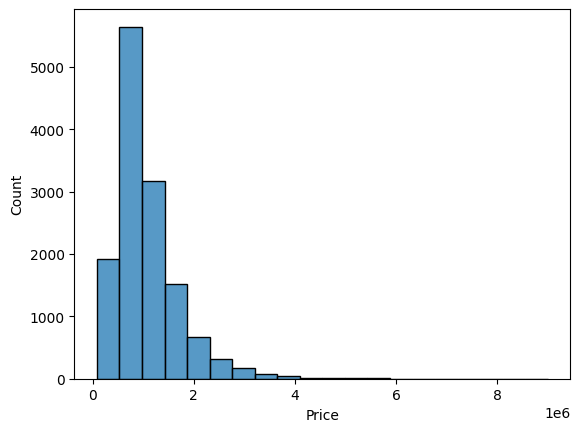

In [4]:
sns.histplot(df['Price'],bins=20)
plt.show()

<hr>

### **Nomor 2**

Tampilkan visualisasi yang menggambarkan rata-rata harga rumah berdasarkan Region Name!

In [5]:
# plt.bar(df['Regionname'],df['Price'].mean())

# plt.xticks(rotation=(90))
# plt.show()

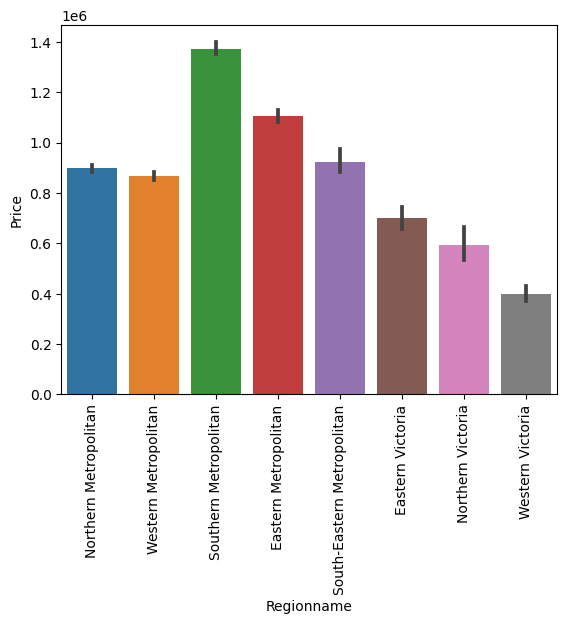

In [6]:
sns.barplot(data=df, x='Regionname', y='Price', estimator=np.mean)
plt.xticks(rotation=(90))
plt.show()

<hr>

### **Nomor 3**

Tampilkan visualisasi yang menggambarkan jumlah rumah untuk tiap tipe rumah (Type)!

In [7]:
df3 = df.groupby('Type')[['Address']].count()
df3.reset_index(inplace=True)
df3


,Type,Address
0,h,9449
1,t,1114
2,u,3017


In [8]:
# plt.bar(data=df3, width='Type', height='Address')
# plt.show()

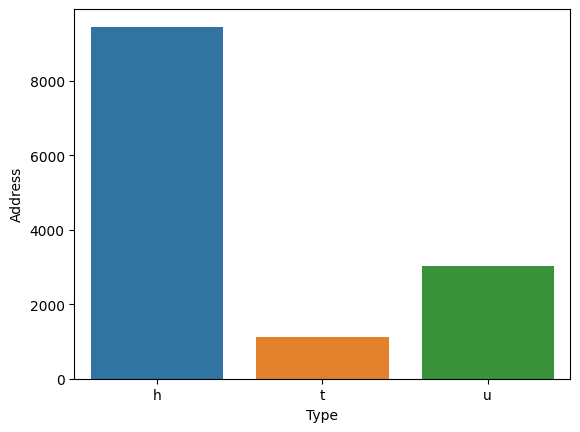

In [9]:
sns.barplot(data=df3, x='Type', y='Address',estimator=np.sum)
plt.show()

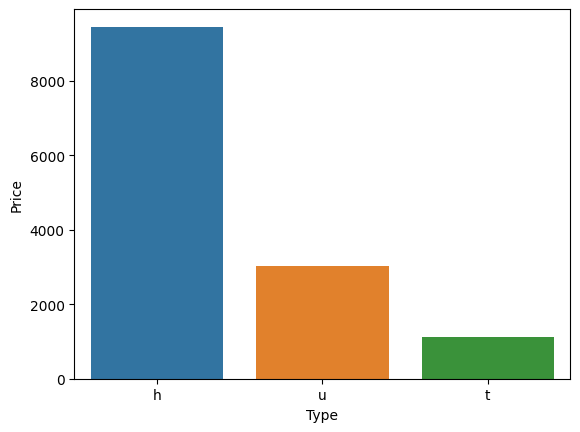

In [10]:
sns.barplot(data=df, x='Type', y='Price',estimator=len)
plt.show()

<hr>

### **Nomor 4**

Tampilkan visualisasi yang menunjukkan nilai korelasi antara variabel 'Rooms', 'Price', 'Distance', 
'BuildingArea', 'YearBuilt'! Variabel apa yang memiliki korelasi paling kuat dengan harga rumah 
(Price)?

<Axes: >

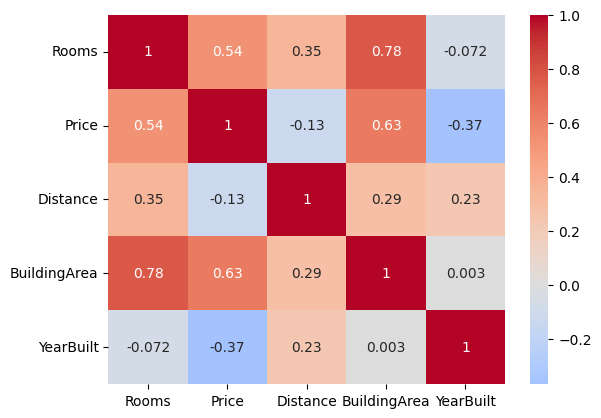

In [11]:
sns.heatmap(df[['Rooms', 'Price', 'Distance', 'BuildingArea', 'YearBuilt']].corr(method='spearman'),
            annot=True, cmap='coolwarm',center= 0)

#   Answer: Building Area

<hr>

### **Nomor 5**

Tampilkan visualisasi yang menggambarkan korelasi antara variabel BuildingArea dan Price!
Sebelum divisualisasikan, hapus dahulu (sementara) rumah dengan Building Area yang lebih dari 2000 m2 (karena dianggap sebagai outlier)

<Axes: >

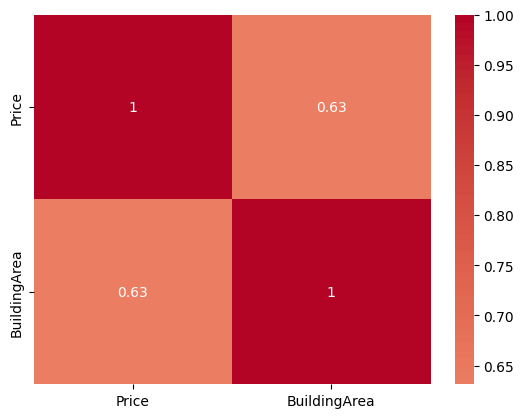

In [12]:
df5 = df.drop(df[df['BuildingArea']>2000].index)
sns.heatmap(df5[['Price', 'BuildingArea']].corr(method='spearman'),
            annot=True, cmap='coolwarm',center= 0)

<hr>

### **Nomor 6**

Dari visualisasi nomor sebelumnya, tambahkan variabel Type (tipe rumah) ke dalam visualisasi
sehingga korelasi antara luas bangunan (Buliding Area) dan harga rumah (Price) juga dapat 
diobservasi berdasarkan tipenya (Type)!

In [13]:
# plt.scatter(data=df5, x='BuildingArea', y= 'Price', hue= 'Type')
# plt.show()

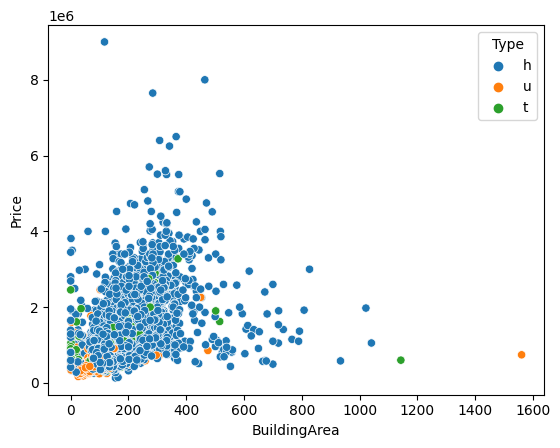

In [14]:
sns.scatterplot(data=df5, x='BuildingArea', y= 'Price', hue= 'Type')
plt.show()

<hr>

### **Nomor 7**

Tampilkan visualisasi yang menggambarkan perubahan jumlah rumah yang dijual dari Jan 2016 - Des 
2017!

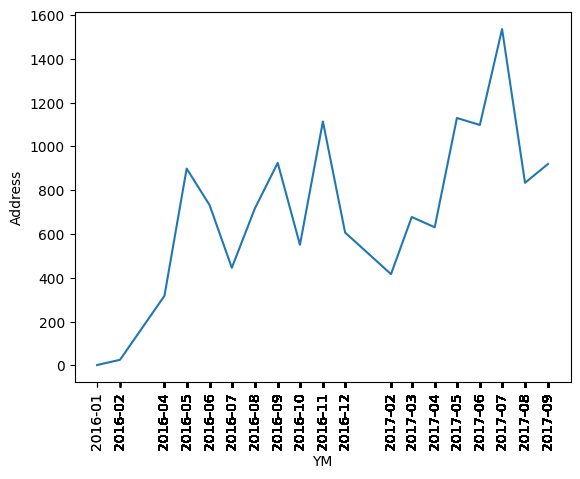

In [15]:
df['Year'] = df['Date'].apply(lambda x: str(x)[-4::1])
df['Month'] = df['Date'].apply(lambda x: str(x)[-7:-5:1])
df['YM'] = df['Year'] +'-'+df['Month']
df['YM'] = pd.to_datetime(df['YM'])
df.groupby('YM')[['Address']].count()
sns.lineplot(data=df.groupby('YM')[['Address']].count(),x='YM',y='Address')
plt.xticks(df['YM'], [dt.strftime('%Y-%m') for dt in df['YM']], rotation=(90))
plt.show()

<hr>

### **Nomor 8**

Tampilkan visualisasi yang menggambarkan perbandingan dari persebaran harga rumah (Price) 
berdasarkan tipe rumah (Type)! Rumah di harga berapa untuk sebuah rumah bertipe "t" 
(townhouse) bisa dikatakan sebagai outlier?

<Axes: xlabel='Price', ylabel='Type'>

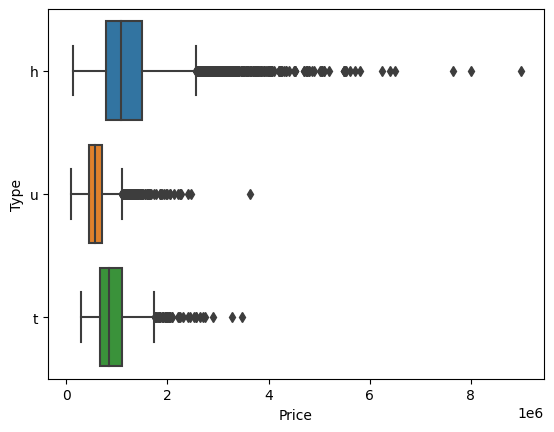

In [16]:
sns.boxplot(data=df, x= 'Price', y= 'Type')

# **Nomor 9**

- Tampilkan rumah paling mahal
- Tandai dengan icon pin berwarna merah
- Beri tooltip berupa "Rumah Termahal"
- Beri popup berupa alamat/address

In [17]:
lat9 =df[df['Price']==df['Price'].max()]['Lattitude'].values[0]
long9 =df[df['Price']==df['Price'].max()]['Longtitude'].values[0]
add9 =df[df['Price']==df['Price'].max()]['Address'].values[0]
mel_map = folium.Map(location=[lat9, long9],zoom_start=20)
maxprice = folium.Marker(location=[lat9, long9]
                         , tooltip='Rumah Termahal',
                         popup = add9,
                         icon= folium.Icon(color='red'))
maxprice.add_to(mel_map)
mel_map

# **Nomor 10**

- Ceritanya kita sedang mencari apartment (type='u') dengan 2 kamar tidur (Bedroom2) dengan harga yg murah
- Coba tampilkan peta kota Melbourne
- Berikan marker berupa pin pada 5 apartment termurah
- Berikan tooltip berupa harga rumah
- Berikan popup berupa Suburb dan Address

In [18]:
df10 = df[(df['Type']=='u') & (df['Bedroom2']==2)].sort_values(by='Price').head(5)
df10.iloc[[4]]
lat10=[]
long10=[]
add10=[]
price10=[]
suburb10=[]
for i in range(5):
    lat10.append(df10.iloc[[i]]['Lattitude'].values[0])
    long10.append(df10.iloc[[i]]['Longtitude'].values[0])
    add10.append(df10.iloc[[i]]['Address'].values[0])
    price10.append(df10.iloc[[i]]['Price'].values[0])
    suburb10.append(df10.iloc[[i]]['Suburb'].values[0])


mel_map = folium.Map(location=[-37.9707259,144.393713],zoom_start=9)
for i in range(5):
    minprice = folium.Marker(location=[lat10[i], long10[i]]
                            , tooltip=price10[i],
                            popup = add10[i] +', '+suburb10[i],
                            icon= folium.Icon(color='red'))
    minprice.add_to(mel_map)
mel_map